In [2]:
%matplotlib inline

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapely
import scipy
from shapely.geometry import Polygon, Point
from shapely import wkt


In [4]:
flare_set = pd.read_csv('flares_dataset.csv', delimiter = ',', header = 0)

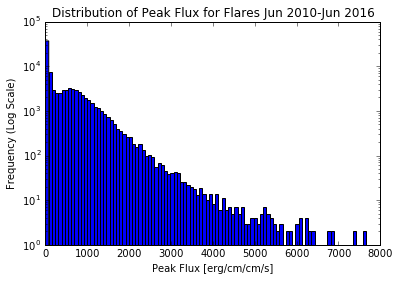

In [161]:
peak_flux = flare_set['fl_peakflux']

_ = plt.hist(peak_flux, bins = 100, log = True)
_ = plt.title('Distribution of Peak Flux for Flares Jun 2010-Jun 2016')
_ = plt.ylabel('Frequency (Log Scale)')
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')

In [5]:
#look at this histogram on a month by month basis, will a diff pattern emerge given solar cycle?

In [27]:
flare_ef = pd.read_csv('flare_search_2014-01-01_2014-06-30_60_300.csv', delimiter = ',', header = 0)

unique_flare = flare_ef.SOL_standard.unique()
print len(unique_flare)

5037


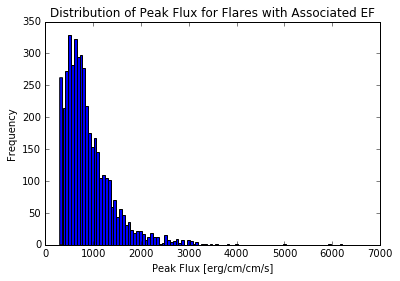

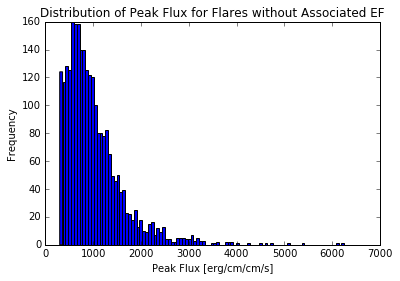

In [23]:
associated_ef = flare_ef['associated_ef']
no_ef_flares = flare_ef.ix[flare_ef['is_ef']==0]
ef_flares = flare_ef.ix[flare_ef['is_ef']==1]

peak_flux_ef = ef_flares['fl_peakflux']
peak_flux_no_ef = no_ef_flares['fl_peakflux']

_ = plt.hist(peak_flux_ef, bins = 100, log = False)
_ = plt.title('Distribution of Peak Flux for Flares with Associated EF')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')

plt.show()

_ = plt.hist(peak_flux_no_ef, bins = 100, log = False)
_ = plt.title('Distribution of Peak Flux for Flares without Associated EF')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')

plt.show()


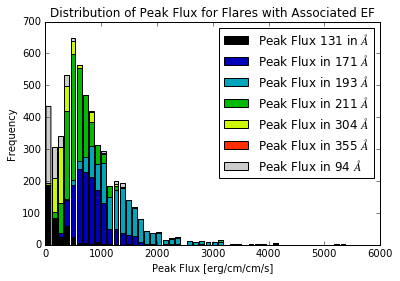

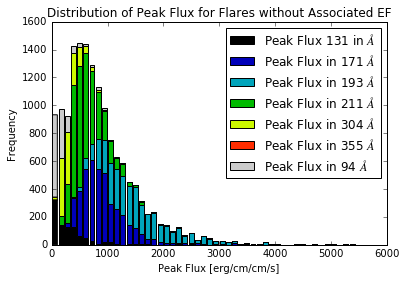

In [124]:
flaress = pd.read_csv('flare_search_2014-01-01_2014-12-31_60_300.csv', delimiter = ',', header = 0)

no_ef_flares = flaress.ix[flaress['is_ef']==0]
ef_flares = flaress.ix[flaress['is_ef']==1]
n =7
colormap = plt.cm.nipy_spectral
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9999, n)])
fl_peakfluxs_no_ef = no_ef_flares.as_matrix(columns=['fl_peakflux_131','fl_peakflux_171','fl_peakflux_193', 
                                            'fl_peakflux_211', 'fl_peakflux_304', 'fl_peakflux_355', 'fl_peakflux_94'])
fl_peakfluxs_ef = ef_flares.as_matrix(columns=['fl_peakflux_131','fl_peakflux_171','fl_peakflux_193', 'fl_peakflux_211',
                                  'fl_peakflux_304', 'fl_peakflux_355', 'fl_peakflux_94'])

# fl_peakfluxs_no_ef = no_ef_flares[['fl_peakflux_131','fl_peakflux_171','fl_peakflux_193', 'fl_peakflux_211',
#                                   'fl_peakflux_304', 'fl_peakflux_355', 'fl_peakflux_94']]

# fl_peakfluxs_ef = ef_flares[['fl_peakflux_131', 'fl_peakflux_171','fl_peakflux_193', 'fl_peakflux_211',
#                                   'fl_peakflux_304', 'fl_peakflux_355', 'fl_peakflux_94']]

label = [r'Peak Flux 131 in $\AA$',r'Peak Flux in 171 $\AA$',r'Peak Flux in 193 $\AA$', r'Peak Flux in 211 $\AA$',
                                  r'Peak Flux in 304 $\AA$', r'Peak Flux in 355 $\AA$', r'Peak Flux in 94 $\AA$']

_ = plt.hist(fl_peakfluxs_ef, bins = 50, stacked = True, range = (1, 5500), label = label)
_ = plt.title('Distribution of Peak Flux for Flares with Associated EF')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.legend()

plt.show()
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9999, n)])
_ = plt.hist(fl_peakfluxs_no_ef, bins = 50, stacked = True, range = (1, 5550), label = label)
_ = plt.title('Distribution of Peak Flux for Flares without Associated EF')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.legend()


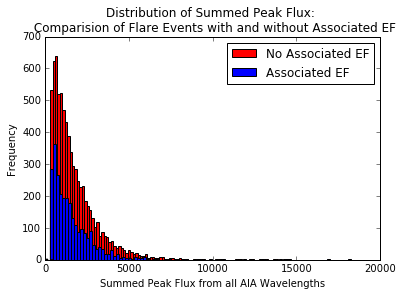

In [151]:
total_pk_flux = (flaress['fl_peakflux_131']+flaress['fl_peakflux_171']+ flaress['fl_peakflux_193']+ flaress['fl_peakflux_211']
                                  +flaress['fl_peakflux_304']+flaress['fl_peakflux_355']+flaress['fl_peakflux_94'])
no_ef_flares = flaress.ix[flaress['is_ef']==0]
ef_flares = flaress.ix[flaress['is_ef']==1]
flaress.loc[:, 'total_pk_flux'] = total_pk_flux
plt.xlabel('Summed Peak Flux from all AIA Wavelengths')
plt.ylabel('Frequency')
plt.title('Distribution of Summed Peak Flux: \n Comparision of Flare Events with and without Associated EF')


_=plt.hist(no_ef_flares['total_pk_flux'], bins = 100, color = 'r', label = 'No Associated EF')
_=plt.hist(ef_flares['total_pk_flux'], bins = 100, label = 'Associated EF')
_=plt.legend()

In [159]:
def remove_nans(x,y):
    x_m = np.ma.masked_array(x,mask=np.isnan(y)).compressed()
    y_m = np.ma.masked_array(y,mask=np.isnan(y)).compressed()
    x_m = np.ma.masked_array(x_m,mask=np.isnan(x_m)).compressed()
    y_m = np.ma.masked_array(y_m,mask=np.isnan(x_m)).compressed()
    return x_m, y_m
    

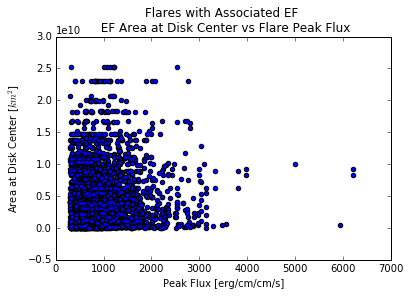

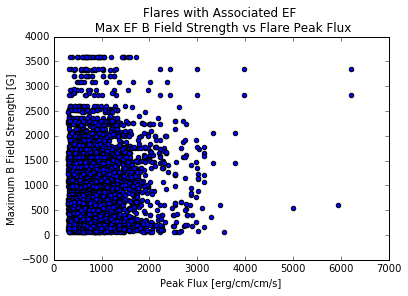

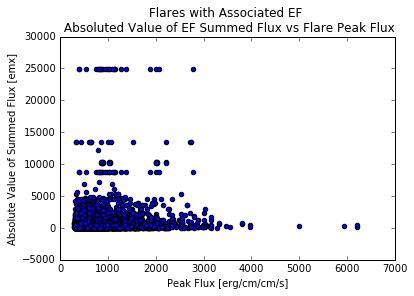

LinregressResult(slope=0.34646664955210466, intercept=648.54636446918471, rvalue=0.078343400803239732, pvalue=2.0154384707284599e-07, stderr=0.066548663353464474)

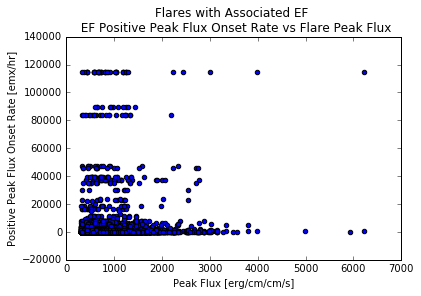

In [165]:
no_ef_flares = flare_ef.ix[flare_ef['is_ef']==0]
ef_flares = flare_ef.ix[flare_ef['is_ef']==1]


abs_sumflux_ef = ef_flares['ef_sumpossignedflux'] -ef_flares['ef_sumnegsignedflux']
peak_flux_ef = ef_flares['fl_peakflux']
maxmagfieldstrength = ef_flares['maxmagfieldstrength']

pospeakfluxonsetrate = ef_flares['ef_pospeakfluxonsetrate']

area_atdiskcenter = ef_flares['area_atdiskcenter']
plt.scatter(peak_flux_ef, area_atdiskcenter)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel(r'Area at Disk Center [$km^2$]')
plt.title('Flares with Associated EF \n EF Area at Disk Center vs Flare Peak Flux')
plt.show()


plt.scatter(peak_flux_ef, maxmagfieldstrength)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Maximum B Field Strength [G]')
plt.title('Flares with Associated EF \n Max EF B Field Strength vs Flare Peak Flux')
plt.show()

_ = plt.scatter(peak_flux_ef, abs_sumflux_ef)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Absolute Value of Summed Flux [emx]')
plt.title('Flares with Associated EF \n Absoluted Value of EF Summed Flux vs Flare Peak Flux')

plt.show()


_ = plt.scatter(peak_flux_ef, pospeakfluxonsetrate)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Positive Peak Flux Onset Rate [emx/hr]')
_ = plt.title('Flares with Associated EF \n EF Positive Peak Flux Onset Rate vs Flare Peak Flux')
from scipy.stats import linregress

peak_flux_ef_m = np.ma.masked_array(peak_flux_ef,mask=np.isnan(abs_sumflux_ef)).compressed()
abs_sumflux_ef_m = np.ma.masked_array(abs_sumflux_ef,mask=np.isnan(abs_sumflux_ef)).compressed()
peak_flux_ef_m = np.ma.masked_array(peak_flux_ef_m,mask=np.isnan(peak_flux_ef_m)).compressed()
abs_sumflux_ef_m = np.ma.masked_array(abs_sumflux_ef_m,mask=np.isnan(peak_flux_ef_m)).compressed()

linregress(peak_flux_ef_m, abs_sumflux_ef_m)




In [154]:
ef_flares = flare_ef.ix[flare_ef['is_ef']==1]
ef_flares = flare_ef.ix[flare_ef['is_ef']==1]

r = 966
j = 0
length = ef_flares.shape[0]
zeroes = [0 for i in range(length)]
ef_flares.loc[:, 'distance'] = zeroes
for i in range(length):
    fl_point = Point((ef_flares['hpc_x'].values[i], ef_flares['hpc_y'].values[i]))
    ef_poly = wkt.loads(ef_flares['ef_hpc_bbox'].values[i])
    chord = fl_point.distance(ef_poly)
    s = r*np.arcsin(chord/(2*r))
    ef_flares['distance'].values[i] = s
    if s == 0:
        j+= 1
    
print j
print i
ratio = float(j)/float(i)
print ratio

float(j)/float(len(flare_ef))
#float(len(ef_flares))/float(len(flare_ef))

    

1556
4426
0.351558969724


0.22114837976122798

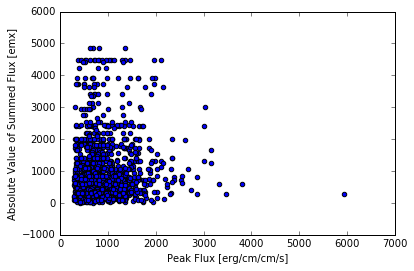

LinregressResult(slope=0.15545526829877218, intercept=820.77804890020934, rvalue=0.080782217555650238, pvalue=0.0018628793228858342, stderr=0.049875112774523167)
LinregressResult(slope=0.00017901405157379687, intercept=6.2747899691226605, rvalue=0.087106430224730136, pvalue=0.00079155030366640292, stderr=5.3235204324843463e-05)


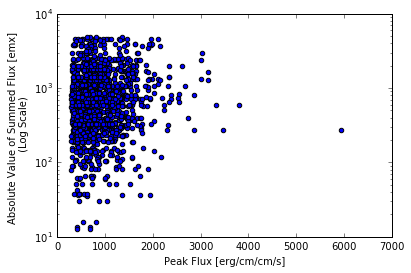

In [155]:
ef_contained = ef_flares.ix[ef_flares['distance']==0]
abs_sumflux_ef = ef_contained['ef_sumpossignedflux'] -ef_contained['ef_sumnegsignedflux']
ef_contained.loc[:, 'abs_sumflux_ef'] = abs_sumflux_ef
ef_contained = ef_contained.ix[ef_contained['abs_sumflux_ef']<=5000]
peak_flux_ef = ef_contained['fl_peakflux']
abs_sumflux_ef = ef_contained['abs_sumflux_ef']

_ = plt.scatter(peak_flux_ef, abs_sumflux_ef)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Absolute Value of Summed Flux [emx]')
plt.show()
_ = plt.scatter(peak_flux_ef, ef_contained['abs_sumflux_ef'])
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Absolute Value of Summed Flux [emx] \n (Log Scale)')
plt.semilogy()

from scipy.stats import linregress

peak_flux_ef_m = np.ma.masked_array(peak_flux_ef,mask=np.isnan(abs_sumflux_ef)).compressed()
abs_sumflux_ef_m = np.ma.masked_array(abs_sumflux_ef,mask=np.isnan(abs_sumflux_ef)).compressed()
peak_flux_ef_m = np.ma.masked_array(peak_flux_ef_m,mask=np.isnan(peak_flux_ef_m)).compressed()
abs_sumflux_ef_m = np.ma.masked_array(abs_sumflux_ef_m,mask=np.isnan(peak_flux_ef_m)).compressed()
abs_sumflux_ef_m_log = np.log(abs_sumflux_ef_m)

print linregress(peak_flux_ef_m, abs_sumflux_ef_m)
print linregress(peak_flux_ef_m, abs_sumflux_ef_m_log)

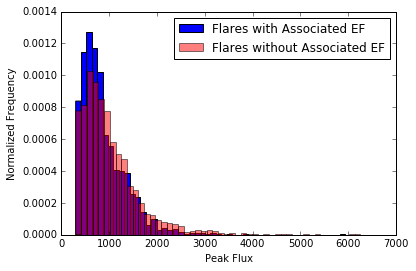

In [139]:
_ = plt.hist(peak_flux_ef, bins = 50, normed = True, label = 'Flares with Associated EF')
_ = plt.hist(peak_flux_no_ef, color = 'r', bins = 50, normed = True, alpha = 0.5, label = 'Flares without Associated EF')
plt.legend()
_ = plt.xlabel('Peak Flux')
_ = plt.ylabel('Normalized Frequency')

